In [1]:
#Import libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/SampleSuperstore.csv')
df.head(5)

,ShipMode,Segment,Country,City,State,PostalCode,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ShipMode     9994 non-null   object 
 1   Segment      9994 non-null   object 
 2   Country      9994 non-null   object 
 3   City         9994 non-null   object 
 4   State        9994 non-null   object 
 5   PostalCode   9994 non-null   int64  
 6   Region       9994 non-null   object 
 7   Category     9994 non-null   object 
 8   SubCategory  9994 non-null   object 
 9   Sales        9994 non-null   float64
 10  Quantity     9994 non-null   int64  
 11  Discount     9994 non-null   float64
 12  Profit       9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### dataset information of store table
####  Ship Mode : Shipping Class
####  Segment : Product Segment
####  Country : United States
####  City : City of the product ordered
####  State : State of product ordered
####  Category : Product category
####  Sub_Category : Product sub category
####  Sales : Sales contribution of the order
####  Quantity : Quantity Ordered
####  Discount : % discount given
####  Profit : Profit for the order

In [5]:
df.describe()

,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#check null in columns
df.isnull().sum()

ShipMode       0
Segment        0
Country        0
City           0
State          0
PostalCode     0
Region         0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

# EDA Info 

##  Which shipping mode does customer choose based on the products category and sum of the quantity?

In [9]:
df_shipmode = df[['ShipMode','Category','Quantity']].groupby(['ShipMode','Category']).sum('Quantity')
df_shipmode

Quantity
ShipMode       Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<AxesSubplot:title={'center':'Ship Mode vs Sum of Quantity'}, xlabel='Ship Mode with Category', ylabel='Sum of Quantity'>

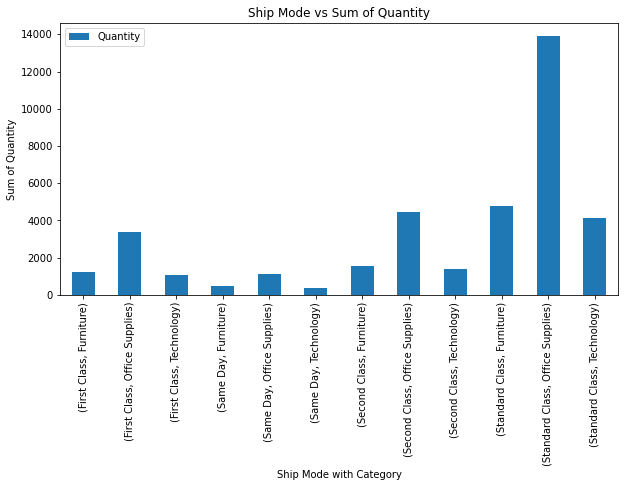

In [10]:
df_shipmode.plot(kind='bar', title='Ship Mode vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Ship Mode with Category', figsize=(10, 5))

### => Conclusion: Most of the customers prefer to choose Standard mode for shipping 

## Maximum number of Sales from which State?

In [11]:
state_sales_df = pd.pivot_table(data=df[['State','Sales']], 
                        index=['State'], 
                        values='Sales',
                        aggfunc='max')

state_sales_df.sort_values(by='Sales', ascending=False).head(10)

,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


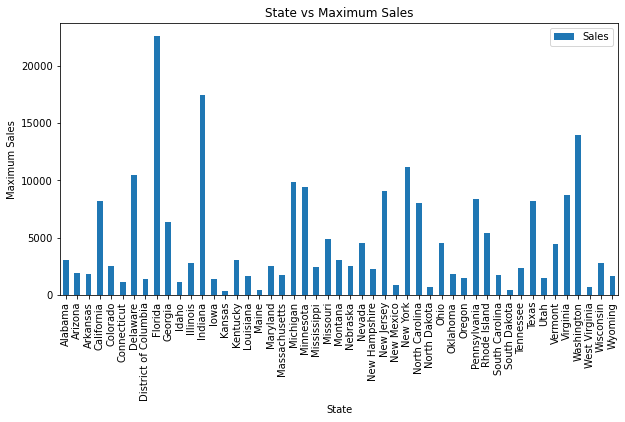

In [12]:
state_sales_df.plot(kind='bar', title='State vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='State', figsize=(10, 5));

### Conclusion: From Florida we got maximum sales

## From which State we got maximum profit?

In [13]:
state_profit_df = pd.pivot_table(data=df[['State','Profit']], 
                        index=['State'], 
                        values='Profit',
                        aggfunc='max')

state_profit_df.sort_values(by='Profit', ascending=False).head(10)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755
New York,3919.9888
Georgia,3177.4750
Virginia,2799.9840
Rhode Island,2591.9568


<AxesSubplot:title={'center':'State vs Maximum Profit'}, xlabel='State', ylabel='Maximum Profit'>

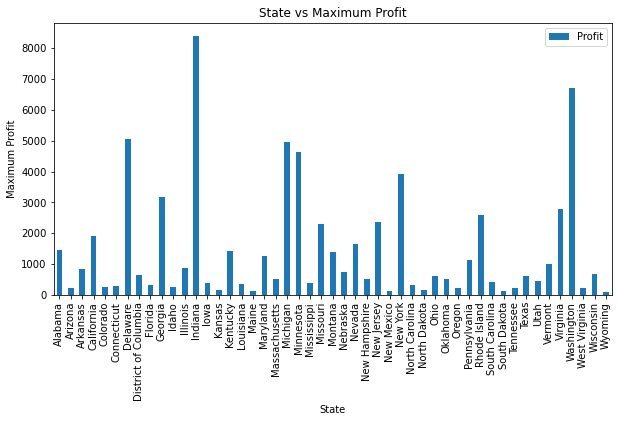

In [14]:
state_profit_df.plot(kind='bar', title='State vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='State', figsize=(10, 5))

### Conclusion:  Indiana got maximum profit.

## Which Products are selling the most?

In [16]:
df_Category_sales = pd.pivot_table(data=df[['Category','SubCategory','Sales']], 
                        index=['Category','SubCategory'], 
                        values='Sales',
                        aggfunc='max')

df_Category_sales


Sales
Category        SubCategory           
Furniture       Bookcases     4404.900
                Chairs        4416.174
                Furnishings   1336.440
                Tables        4297.644
Office Supplies Appliances    2625.120
                Art           1113.024
                Binders       9892.740
                Envelopes      604.656
                Fasteners       93.360
                Labels         786.480
                Paper          733.950
                Storage       2934.330
                Supplies      8187.650
Technology      Accessories   3347.370
                Copiers      17499.950
                Machines     22638.480
                Phones        4548.810

<AxesSubplot:title={'center':'Category vs Maximum Sales'}, xlabel='Category', ylabel='Maximum Sales'>

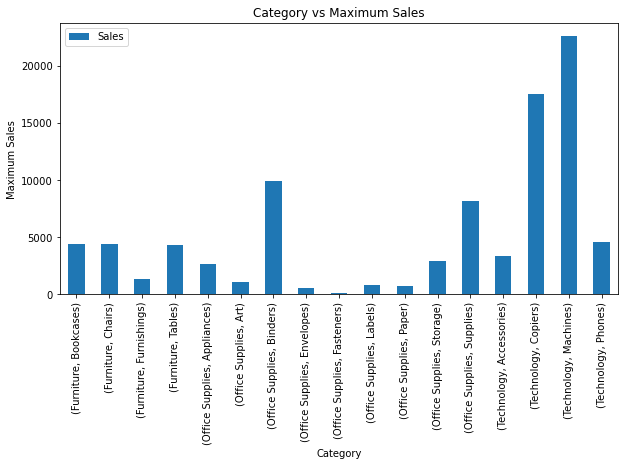

In [17]:
df_Category_sales.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='Category', figsize=(10, 5))

### Conclusion: Machines - Technology  are selling the most

## Which Products are purchased in more quantity?

In [19]:
df_Category_quantity = pd.pivot_table(data=df[['Category','SubCategory','Quantity']], 
                        index=['Category','SubCategory'], 
                        values='Quantity',
                        aggfunc='sum')

df_Category_quantity

Quantity
Category        SubCategory          
Furniture       Bookcases         868
                Chairs           2356
                Furnishings      3563
                Tables           1241
Office Supplies Appliances       1729
                Art              3000
                Binders          5974
                Envelopes         906
                Fasteners         914
                Labels           1400
                Paper            5178
                Storage          3158
                Supplies          647
Technology      Accessories      2976
                Copiers           234
                Machines          440
                Phones           3289

<AxesSubplot:title={'center':'Category vs Sum of Quantity'}, xlabel='Category', ylabel='Sum of Quantity'>

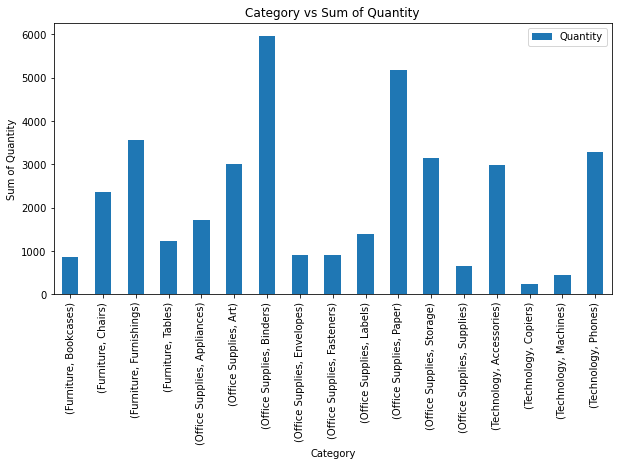

In [20]:
df_Category_quantity.plot(kind='bar', title='Category vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Category', figsize=(10, 5))

### Conclusion: Binders - Office Suppliers  are purchased in more quantity.

## By selling which products we got the maximum profit?

In [22]:
df_Category_profit = pd.pivot_table(data=df[['Category','SubCategory','Profit']], 
                        index=['Category','SubCategory'], 
                        values='Profit',
                        aggfunc='max')

df_Category_profit

Profit
Category        SubCategory           
Furniture       Bookcases    1013.1270
                Chairs        770.3520
                Furnishings   387.5676
                Tables        629.0100
Office Supplies Appliances    793.7160
                Art           112.5740
                Binders      4946.3700
                Envelopes     204.0714
                Fasteners      21.8880
                Labels        385.3752
                Paper         352.2960
                Storage       792.2691
                Supplies      327.5060
Technology      Accessories   829.3754
                Copiers      8399.9760
                Machines     2799.9840
                Phones       1228.1787

<AxesSubplot:title={'center':'Category vs Maximum Profit'}, xlabel='Category', ylabel='Maximum Profit'>

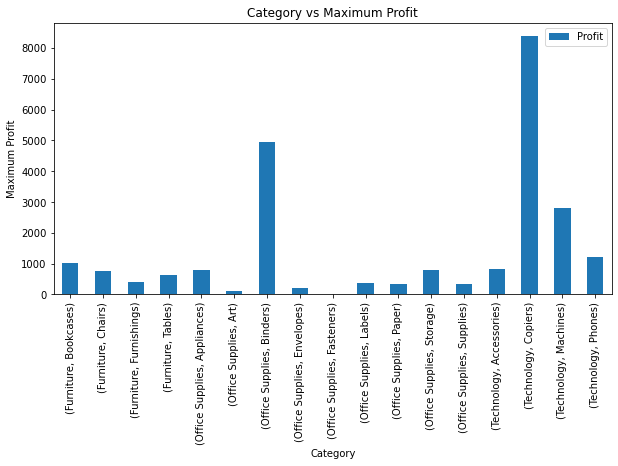

In [23]:
df_Category_profit.plot(kind='bar', title='Category vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='Category', figsize=(10, 5))

### Conclusion: Copiers from Technology  -  got the maximum profit.

# Final Conclusion:
## Most of the customers prefer to choose Standard mode for shipping while

## Compared to other modes.

## From Florida we got maximum sales.

## From Indiana we got maximum profit.

## Machines from Technology category are selling the most.

## Binders from Office Suppliers category are purchased in more quantity.

## By selling Copiers from Technology category we got the maximum profit.